#  Data Exploration - Traffic Dataset

In [50]:
# Import Libs and Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

sns.set_palette("GnBu_d")
sns.set_style("whitegrid")


In [51]:
# Load the Datasets

traffic_train = pd.read_csv('../datasets/training_data.csv', encoding='latin1')
traffic_test = pd.read_csv('../datasets/test_data.csv', encoding='latin1')

In [52]:
# Initial Overview
traffic_train.head()


,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


In [53]:
traffic_train.info()
traffic_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       4612 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0
mean,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0
std,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0
min,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0
25%,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0
50%,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0
75%,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0
max,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0


In [54]:
traffic_train.isna().sum()

city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF         2200
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6249
dtype: int64

<Axes: >

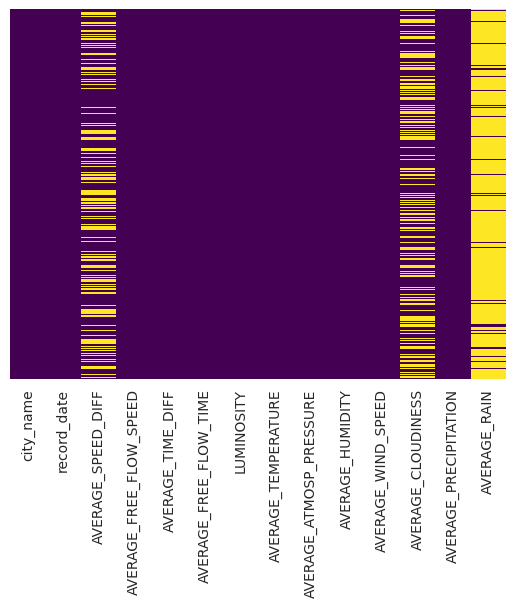

In [55]:
sns.heatmap(traffic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [56]:
# Change Date Column
traffic_train['record_date'] = pd.to_datetime(traffic_train['record_date'])
traffic_train.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


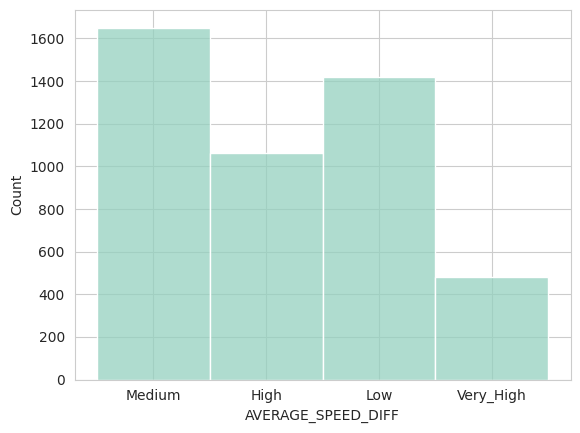

In [57]:
sns.histplot(traffic_train['AVERAGE_SPEED_DIFF'], bins=10)
plt.show()

<Axes: >

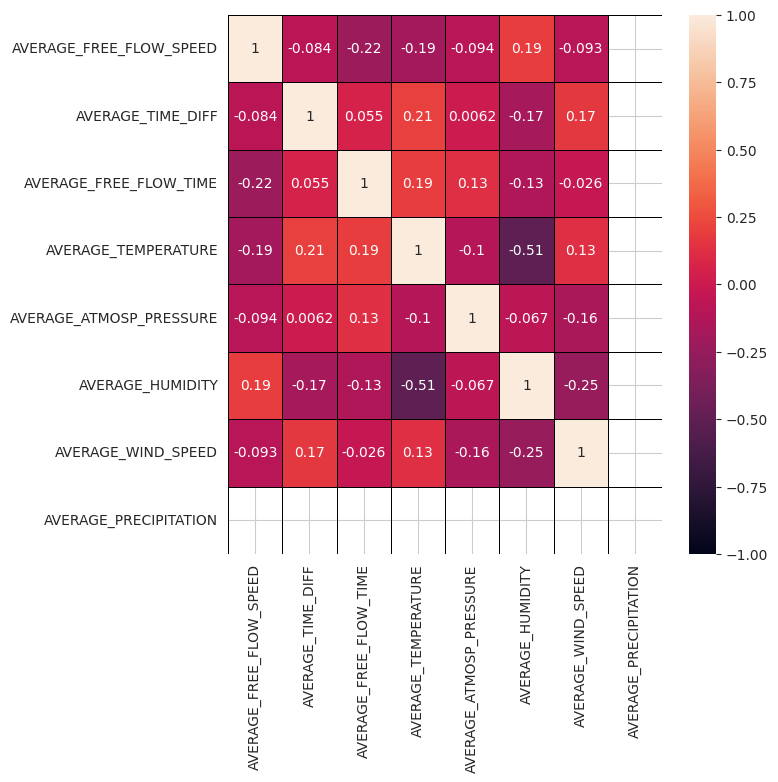

In [58]:
fig = plt.figure(figsize = (7, 7))
treino_corr = traffic_train.corr(method = 'pearson', numeric_only=True)
sns.heatmap(treino_corr, linecolor='black', linewidths=0.5, annot=True, vmax=1, vmin=-1)

In [59]:
#sns.pairplot(traffic_train)

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.stats import zscore

for df in [traffic_train, traffic_test]:
    df['record_date'] = pd.to_datetime(df['record_date'])
    df['hour'] = df['record_date'].dt.hour
    df['day_of_week'] = df['record_date'].dt.dayofweek
    df['month'] = df['record_date'].dt.month

features = ['AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF', 'AVERAGE_FREE_FLOW_TIME',
            'AVERAGE_TEMPERATURE', 'AVERAGE_ATMOSP_PRESSURE',
            'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED', 'hour', 'day_of_week', 'month']


#traffic_train.drop(['AVERAGE_RAIN','AVERAGE_CLOUDINESS','LUMINOSITY'], axis = 1, inplace=True)
#traffic_test.drop(['AVERAGE_RAIN','AVERAGE_CLOUDINESS','LUMINOSITY'], axis = 1, inplace=True)

traffic_train.dropna(inplace=True)

for col in features:
    Q1 = traffic_train[col].quantile(0.25)
    Q3 = traffic_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    traffic_train = traffic_train[(traffic_train[col] >= lower_bound) & (traffic_train[col] <= upper_bound)]

X = traffic_train[features]
y = traffic_train['AVERAGE_SPEED_DIFF']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=20)

dt_params = {
    'max_depth': [3, 5, 7, 10, 12, None],
    'min_samples_split': [2, 4, 5, 8, 10],
    'min_samples_leaf': [1, 2, 4, 8]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=20),
                       dt_params,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)
dt_grid.fit(X_train, y_train)

print("Melhor Decision Tree:", dt_grid.best_params_)
y_pred_dt = dt_grid.predict(X_val)
print("Accuracy DT:", accuracy_score(y_val, y_pred_dt))

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=20),
                       rf_params,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Melhor Random Forest:", rf_grid.best_params_)
y_pred_rf = rf_grid.predict(X_val)
print("Accuracy RF:", accuracy_score(y_val, y_pred_rf))

gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5]
}

gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=20),
                       gb_params,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)
gb_grid.fit(X_train, y_train)

print("Melhor Gradient Boosting:", gb_grid.best_params_)
y_pred_gb = gb_grid.predict(X_val)
print("Accuracy GB:", accuracy_score(y_val, y_pred_gb))

best_model = dt_grid.best_estimator_  
X_test = traffic_test[features]
traffic_test['Speed_Diff'] = best_model.predict(X_test)

submission = pd.DataFrame({
    'RowId': range(1, len(traffic_test)+1),
    'Speed_Diff': traffic_test['Speed_Diff']
})

submission.to_csv("submission_test.csv", index=False)


Melhor Decision Tree: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy DT: 0.7552870090634441


KeyboardInterrupt: 